In [1]:
# %%
import numpy as np
import os
import sys
sys.path.append('\\'.join(os.getcwd().split('\\')[:-1]))
from model.neural_network import *
from training.train import train_model
from testing.test import evaluate_model
from matplotlib import pyplot as plt
from data.cifar10_loader import load_cifar10_data
from model.neural_network import NeuralNetwork
sys.path.append('\\'.join(os.getcwd().split('\\')[:-1]))
# sys.path.append('\\'.join([os.getcwd(),'src']))
print(sys.path)


['d:\\DATA\\51\\cifar10-neural-network\\src', 'd:\\ANACONDA_gsy\\anaconda\\python38.zip', 'd:\\ANACONDA_gsy\\anaconda\\DLLs', 'd:\\ANACONDA_gsy\\anaconda\\lib', 'd:\\ANACONDA_gsy\\anaconda', '', 'C:\\Users\\gsy\\AppData\\Roaming\\Python\\Python38\\site-packages', 'd:\\ANACONDA_gsy\\anaconda\\lib\\site-packages', 'd:\\ANACONDA_gsy\\anaconda\\lib\\site-packages\\locket-0.2.1-py3.8.egg', 'd:\\ANACONDA_gsy\\anaconda\\lib\\site-packages\\win32', 'd:\\ANACONDA_gsy\\anaconda\\lib\\site-packages\\win32\\lib', 'd:\\ANACONDA_gsy\\anaconda\\lib\\site-packages\\Pythonwin', 'd:\\ANACONDA_gsy\\anaconda\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\gsy\\.ipython', 'd:\\DATA\\51\\cifar10-neural-network', 'd:\\DATA\\51\\cifar10-neural-network\\src', 'd:\\DATA\\51\\cifar10-neural-network\\src', 'd:\\DATA\\51\\cifar10-neural-network']


In [2]:
num_epochs = 20
batch_size = 64

save_path = 'best_model_weights.pkl'
data_dir = 'data/cifar-10-batches-py'
weight_decay = 0
momentum = 0.0

# Load CIFAR-10 data
(X_train, y_train), (X_val, y_val),  (X_test,y_test)= load_cifar10_data(data_dir=data_dir)

In [4]:
# 读取最佳超参数和验证准确率
hyper_path = '\\'.join(os.getcwd().split('\\')[:-1])
with open(hyper_path + '\\' + 'best_hyperparameters.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        print(line.strip())


Best hyperparameters: {'lr': 1e-05, 'hls': [512, 256], 'l2_reg': 1e-06, 'act': <class 'model.neural_network.ReLU'>, 'init': 'random'}


In [5]:
best_params= {'lr': 1e-05, 'hls': [512, 256], 'l2_reg': 1e-06, 'act': ReLU, 'init': 'random'}

In [6]:
# 训练最优超参数模型
train_loss,val_acc,best_val_acc = train_model(X_train, y_train, X_val, y_val, best_params['hls'], best_params['lr'], momentum, weight_decay, num_epochs, batch_size, best_params['l2_reg'], save_path, activation=best_params['act'], init_method=best_params['init'])


Epoch 1/20, Train Loss: 1.8554, Validation Accuracy: 0.3868
Epoch 2/20, Train Loss: 1.6637, Validation Accuracy: 0.4140
Epoch 3/20, Train Loss: 1.5838, Validation Accuracy: 0.4272
Epoch 4/20, Train Loss: 1.5270, Validation Accuracy: 0.4468
Epoch 5/20, Train Loss: 1.4804, Validation Accuracy: 0.4464
Epoch 6/20, Train Loss: 1.4429, Validation Accuracy: 0.4682
Epoch 7/20, Train Loss: 1.4078, Validation Accuracy: 0.4664
Epoch 8/20, Train Loss: 1.3764, Validation Accuracy: 0.4608
Epoch 9/20, Train Loss: 1.3491, Validation Accuracy: 0.4752
Epoch 10/20, Train Loss: 1.3191, Validation Accuracy: 0.4780
Epoch 11/20, Train Loss: 1.2923, Validation Accuracy: 0.4926
Epoch 12/20, Train Loss: 1.2699, Validation Accuracy: 0.4924
Epoch 13/20, Train Loss: 1.2417, Validation Accuracy: 0.4932
Epoch 14/20, Train Loss: 1.2202, Validation Accuracy: 0.4854
Epoch 15/20, Train Loss: 1.1972, Validation Accuracy: 0.4958
Epoch 16/20, Train Loss: 1.1724, Validation Accuracy: 0.5010
Epoch 17/20, Train Loss: 1.1536, 

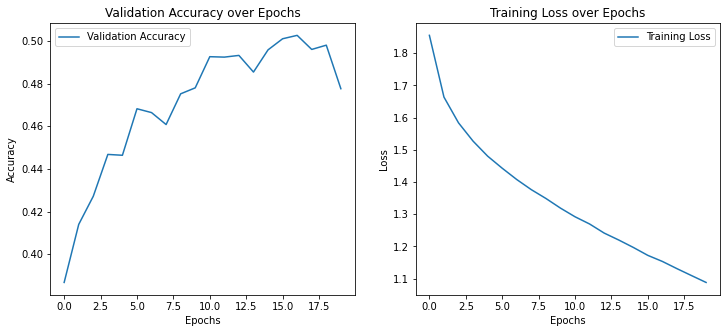

<Figure size 432x288 with 0 Axes>

In [7]:
## 画图 train_loss and val_acc
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

plt.savefig('train_loss_val_acc.png', dpi=300, bbox_inches='tight')


In [8]:
# Initialize the neural network with the best hyperparameters and weights

model = NeuralNetwork(input_size=X_train.shape[1], hidden_sizes=best_params['hls'],  output_size=10, activation = best_params['act'], reg_lambda=best_params['l2_reg'],init_method = best_params['init'])

model.load_weights(save_path)

## Evaluate the model on the test set

acc_test = evaluate_model(model, X_test, y_test)



print(f"Test Accuracy: {acc_test * 100:.2f}%")

Model weights loaded from best_model_weights.pkl
Test Accuracy: 48.90%


In [9]:
print(X_test.shape)

(10000, 3072)


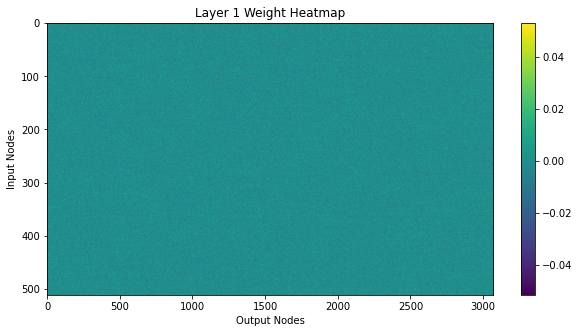

<Figure size 432x288 with 0 Axes>

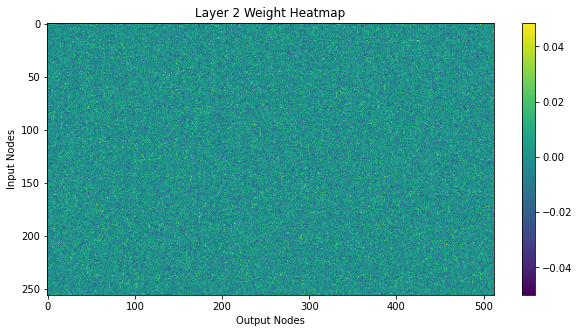

<Figure size 432x288 with 0 Axes>

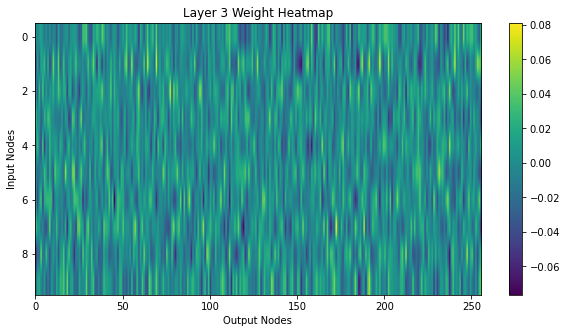

<Figure size 432x288 with 0 Axes>

In [14]:
# 可视化模型参数
def visualize_weights(model):
    k = 1
    for i, layer in enumerate(model.layers):
        if isinstance(layer, LinearLayer):
            plt.figure(figsize=(10, 5))
            plt.imshow(layer.weights.T, aspect='auto', cmap='viridis')
            plt.colorbar()
            plt.title(f'Layer {k} Weight Heatmap')
            plt.xlabel('Output Nodes')
            plt.ylabel('Input Nodes')
            plt.show()
            
            plt.savefig(f'layer_{k}_weights.png', dpi=300, bbox_inches='tight')
            k = k + 1

visualize_weights(model)